In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('bestsellers with categories.csv')

In [4]:
data.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
sizes = data.shape
print(f'{sizes[0]} rows, {sizes[1]} cols')

550 rows, 7 cols


In [6]:
d = data.groupby('Name')
print('Про скільки книг зберігає дані датасет? Відповідь: ', len(d))

Про скільки книг зберігає дані датасет? Відповідь:  351


In [7]:
cols = data.columns.tolist()
for i in range(len(cols)):
    cols[i] = cols[i].lower().replace(' ', '_')
data.columns = cols
data.head(3)

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction


# Первинне дослідження даних

In [8]:
summ = sum(data.isna().sum().to_list())
if summ > 0:
    res = 'Так'
else:
    res = 'Ні'
print('Чи є в якихось змінних пропуски? (Так / ні). Відповідь:', res)

Чи є в якихось змінних пропуски? (Так / ні). Відповідь: Ні


In [9]:
uniq_genre = data['genre'].unique().tolist()

In [10]:
print(' Які є унікальні жанри? Відповідь: ', ', '.join(uniq_genre))

 Які є унікальні жанри? Відповідь:  Non Fiction, Fiction


In [11]:
# diagram

In [12]:
max_price, min_price, mean_price, meedian_price = data['price'].agg(['max', 'min', 'mean', 'median'])

In [13]:
print('Максимальна ціна? Вдповідь: ', max_price)

Максимальна ціна? Вдповідь:  105.0


In [14]:
print('Мінімальна ціна? Вдповідь: ', min_price)

Мінімальна ціна? Вдповідь:  0.0


In [15]:
print('Середня ціна? Вдповідь: ', mean_price)

Середня ціна? Вдповідь:  13.1


In [16]:
print('Медіанна ціна? Вдповідь: ', meedian_price)

Медіанна ціна? Вдповідь:  11.0


# Пошук та сортування даних

In [17]:
max_rate = data['user_rating'].agg('max')
print('Який рейтинг у датасеті найвищий? Відповідь: ', max_rate)

Який рейтинг у датасеті найвищий? Відповідь:  4.9


In [18]:
count_book = data[data['user_rating'].eq(max_rate)].groupby('name').ngroups
print('Скільки книг мають такий рейтинг? Відповідь: ', count_book)

Скільки книг мають такий рейтинг? Відповідь:  28


In [19]:
book = data[data['reviews'].eq(data['reviews'].agg('max'))]
print(' Яка книга має найбільше відгуків? Відповідь: "', book.name.values[0], '"')
book.head()

 Яка книга має найбільше відгуків? Відповідь: " Where the Crawdads Sing "


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


In [20]:
new_data = data.query('year==2015').sort_values('user_rating', ascending=False).head(50)
expensive = new_data[new_data['price'].eq(new_data['price'].agg('max'))]
print(' З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: ', expensive['name'].values[0])
expensive.head()

 З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:  Publication Manual of the American Psychological Association, 6th Edition


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


In [21]:
new_data = data.query('year==2010 & genre=="Fiction"').sort_values('user_rating', ascending=False).head(50)
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: ', new_data.shape[0])

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:  20


In [22]:
new_data = data.query('(year==2010 | year==2011) & user_rating==4.9')
print('Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:', new_data.shape[0])

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [23]:
new_data = data.query('year==2015 & price<8').sort_values('price')
new_data.head(50)

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [24]:
print('Яка книга остання у відсортованому списку? Відповідь: ', new_data.tail(1).name.values[0])
new_data.tail(1).head()

Яка книга остання у відсортованому списку? Відповідь:  Old School (Diary of a Wimpy Kid #10)


,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


# Агрегування даних та з'єднання таблиць

In [25]:
new_data = data.groupby('genre')['price'].agg(['min', 'max'])
new_data.head()

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [26]:
print('Максимальна ціна для жанру Fiction: Відповідь: ', new_data.query('genre=="Fiction"')['max'].values[0])

Максимальна ціна для жанру Fiction: Відповідь:  82


In [27]:
print('Мінімальна ціна для жанру Fiction: Відповідь: ', new_data.query('genre=="Fiction"')['min'].values[0])

Мінімальна ціна для жанру Fiction: Відповідь:  0


In [28]:
print('Максимальна ціна для жанру Non Fiction: Відповідь: ', new_data.query('genre=="Non Fiction"')['max'].values[0])

Максимальна ціна для жанру Non Fiction: Відповідь:  105


In [29]:
print('Мінімальна ціна для жанру Non Fiction: Відповідь: ', new_data.query('genre=="Non Fiction"')['min'].values[0])

Мінімальна ціна для жанру Non Fiction: Відповідь:  0


In [30]:
authors = data[['name', 'author']].groupby('author').agg(cnt=('name','count')).reset_index()

In [31]:
print('Якої розмірності вийшла таблиця? Відповідь: ', authors.shape)

Якої розмірності вийшла таблиця? Відповідь:  (248, 2)


In [32]:
author_max_book = authors.sort_values('cnt').tail(1)
print(' Який автор має найбільше книг? Відповідь: ', author_max_book.values[0][0])

 Який автор має найбільше книг? Відповідь:  Jeff Kinney


In [33]:
print('Скільки книг цього автора? Відповідь: ', author_max_book.values[0][1])

Скільки книг цього автора? Відповідь:  12


In [34]:
avg_ratings = data[['author', 'user_rating']].groupby('author').agg(avg_rating=('user_rating', 'mean')).round(1).reset_index()

In [35]:
print('У якого автора середній рейтинг мінімальний? Відповідь: ', avg_ratings.sort_values('avg_rating').head(1).values[0][0])

У якого автора середній рейтинг мінімальний? Відповідь:  Donna Tartt


In [36]:
print('Який у цього автора середній рейтинг? Відповідь: ', avg_ratings.sort_values('avg_rating').head(1).values[0][1])

Який у цього автора середній рейтинг? Відповідь:  3.9


In [62]:
new_data = pd.concat([authors, avg_ratings], axis=1)
new_data = new_data.loc[:, ~new_data.columns.duplicated()]
new_data.head()
# new_data.shape

,author,cnt,avg_rating
0,Abraham Verghese,2,4.6
1,Adam Gasiewski,1,4.4
2,Adam Mansbach,1,4.8
3,Adir Levy,1,4.8
4,Admiral William H. McRaven,1,4.7


In [38]:
new_data = new_data.sort_values(['cnt', 'avg_rating'])
new_data.head()

,author,cnt,avg_rating
171,Muriel Barbery,1,4.0
43,Chris Cleave,1,4.1
109,Ian K. Smith M.D.,1,4.1
186,Pierre Dukan,1,4.1
81,Elizabeth Strout,1,4.2


In [39]:
print('Який автор перший у списку? Відповідь: ', new_data.head(1).values[0][0])

Який автор перший у списку? Відповідь:  Muriel Barbery


In [64]:
new_data

,author,cnt,avg_rating
171,Muriel Barbery,1,4.0
43,Chris Cleave,1,4.1
109,Ian K. Smith M.D.,1,4.1
186,Pierre Dukan,1,4.1
81,Elizabeth Strout,1,4.2
...,...,...,...
11,American Psychological Association,10,4.5
92,Gary Chapman,11,4.7
226,Suzanne Collins,11,4.7
197,Rick Riordan,11,4.8


In [66]:
%matplotlib inline
import matplotlib.pyplot as plt

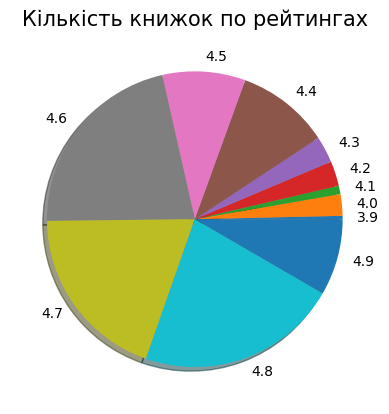

In [92]:
d = new_data.groupby('avg_rating')['cnt'].sum().reset_index()
plt.pie(d['cnt'].values, 
        labels=d['avg_rating'].values, 
        shadow=True, 
        labeldistance=1.1
       )
plt.title('Кількість книжок по рейтингах', fontsize=15, y=1)
plt.show()

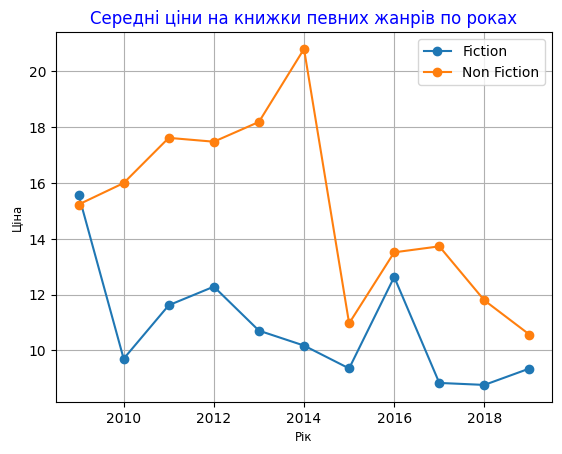

In [111]:
d = data.groupby('genre')
fig, axs = plt.subplots()
for key, value in d:
    gd = value[['year', 'price']].groupby('year').mean().reset_index()
    axs.plot(gd['year'].values, gd['price'].values, label=key, marker='o')
plt.title('Середні ціни на книжки певних жанрів по роках', color='blue')
plt.xlabel('Рік', fontsize='small')
plt.ylabel('Ціна', fontsize='small')
plt.grid()
plt.legend()
plt.show()